In [1]:
import mxnet as mx
from mxnet import nd, autograd, gluon
from __future__ import  print_function
mx.random.seed(1)

In [2]:
data_ctx = mx.cpu()
model_ctx = mx.cpu()

In [3]:
num_inputs = 2
num_outputs = 1
num_examples = 10000

def fn(X):
    return 2 * X[:, 0] - 3.4 * X[:, 1] + 4.2

X = nd.random_normal(0, 1, shape=(num_examples, num_inputs), ctx=data_ctx)
noise = 0.1 * nd.random_normal(shape=(num_examples,), ctx=data_ctx)
y = fn(X) + noise # Element wise


In [4]:
print(X[0])
print(y[0])


[-1.306444    0.11287735]
<NDArray 2 @cpu(0)>

[1.1266251]
<NDArray 1 @cpu(0)>


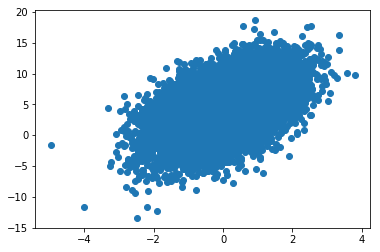

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:, 0].asnumpy(), y.asnumpy())
plt.show()

In [7]:
batch_size = 4
train_data = gluon.data.DataLoader(gluon.data.ArrayDataset(X, y), batch_size=batch_size, shuffle=True)

In [8]:
for (data, label) in train_data:
    print(data, label)
    break


[[-1.3810326  -1.7298423 ]
 [-0.28512    -1.4766775 ]
 [-1.1414193   0.6072224 ]
 [ 0.02888928  0.25177547]]
<NDArray 4x2 @cpu(0)> 
[ 7.457338    8.569887   -0.12309825  3.4417884 ]
<NDArray 4 @cpu(0)>


In [9]:
w = nd.random_normal(shape=(num_inputs, num_outputs), ctx=model_ctx)
b = nd.random_normal(shape=num_outputs, ctx=model_ctx)
params = [w, b]

In [10]:
for param in params:
    param.attach_grad()

In [11]:
def net(X):
    return nd.dot(X, w) + b

In [12]:
def square_loss(yhat, y):
    return nd.mean((yhat - y)**2)

In [13]:
def SGD(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

In [14]:
epochs = 10
learning_rate = 0.0001
num_batches = num_examples / batch_size

for e in range(epochs):
    cumulative_loss = 0
    for (data, label) in train_data:
        data = data.as_in_context(model_ctx)
        label = label.as_in_context(model_ctx).reshape((-1, 1))
        with autograd.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        SGD(params, learning_rate)
        cumulative_loss += loss.asscalar()
    print(cumulative_loss)


77845.4266371727


28551.139751195908


10482.380727171898


3858.554738730192


1430.7422693222761


540.486267266795


213.9487767580431


94.1820314367942


50.29703812522348


34.20160915059387


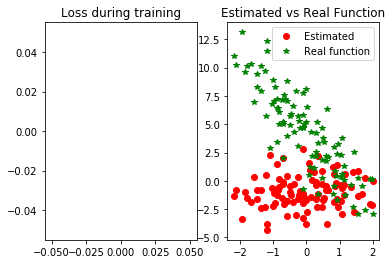

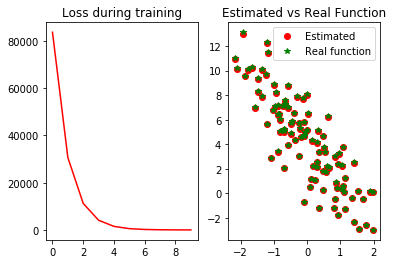

In [24]:
w[:] = nd.random_normal(0, 1, shape=(num_inputs, num_outputs), ctx=model_ctx)
b[:] = nd.random_normal(0, 1, shape=num_outputs, ctx=model_ctx)

def plot(losses, X, sample_size = 100):
    xs = list(range(len(losses)))
    f, (fg1, fg2) = plt.subplots(1, 2)
    fg1.set_title('Loss during training')
    fg1.plot(xs, losses, '-r')
    fg2.set_title('Estimated vs Real Function')
    fg2.plot(X[:sample_size, 1].asnumpy(), net(X[:sample_size, :]).asnumpy(), 'or', label="Estimated")
    fg2.plot(X[:sample_size, 1].asnumpy(), fn(X[:sample_size, :]).asnumpy(), '*g', label="Real function")
    fg2.legend()
    plt.show()
    
learning_rate = 0.0001
losses = []
plot(losses, X)
epochs = 10

for e in range(epochs):
    cumulative_loss = 0
    for (data, label) in train_data:
        data = data.as_in_context(model_ctx)
        label = label.as_in_context(model_ctx).reshape((-1, 1))
        with autograd.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        SGD(params, learning_rate)
        cumulative_loss += loss.asscalar()
    losses.append(cumulative_loss)
    
plot(losses, X)

In [25]:
print(w)
print(b)


[[ 1.9769757]
 [-3.3786428]]
<NDArray 2x1 @cpu(0)>

[4.165115]
<NDArray 1 @cpu(0)>
